In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from scipy.linalg import solve

### Hyperparameters

In [41]:
# -*- PARAMETERS -*-

a = 2
n = 1000      # Number of timesteps 
m = 100      # Number of x-steps

#k = 0.01    # Stepsize in t
#h = 0.50     # Stepsize in x

mu = 1/(np.pi)**2


### Test Solution

In [42]:
#test function
def u(x, t):
    return np.sin(np.pi*x)*np.exp(t)

#initial condition, t = 0
def g_t(x,t):
    return u(x,0)


In [43]:
# Modified Crank-Nicholson scheme


def central_diff(m):
    
    """ This function takes the number of gridpoints in the x-direction as input,
    and returns a second order central difference matrix with respect to the 
    boundary conditions """
    
    d = np.eye(m, k=-1) - 2*np.eye(m, k=0) + np.eye(m, k=1)
    
    return d
   
       
#sett u[0] og u[n] = 0

def crank_nicholsen(a, mu, n, m):
    
    h=1/m
    k=1/n
    
    r = mu*k/(h**2)
    
    #exact solution
    x = np.linspace(0,int(m*h), int(m))
    t = np.linspace(0,int(n*k), int(n))

    u_exact = []
    for i in t:
        u_exact.append(u(x,i))
    
    
    #make A and B  
    A = np.eye(m) - (r/2)*central_diff(m)
    B = np.eye(m) + (r/2)*central_diff(m)+k*a*np.eye(m)
    
    
    #make C
    C = np.linalg.inv(A)@B + k*a/2*np.linalg.inv(A)@B - k*a/2*np.eye(m)
    
    #Dirichlet BC
    C[:,0] = 0
    C[:,m-1] = 0
    
    # Initialize solution matrix
    U = np.zeros((n, m))
    
    # Initialize start distributions,t=0
    U[0, :] = g_t(x,t)
    
    # Solve iteratively
    for i in range(1, n):
        
        U[i,:] = C@U[i-1,:]
        
    return U, u_exact


In [44]:
#U,u_exact = crank_nicholsen_x(h, k, mu, n=n, m=m)

In [45]:
U,u_exact = crank_nicholsen(a, mu, n, m)

### Numerical verification

In [46]:
# We want to measure the error for P different stepsizes
# The least number of intervals (#grid points-1)

def convergence_h(P,m,n,mu,a):
    Hconv = np.zeros(P) #list of stepsizes (x1-axis)
    Econv = np.zeros(P) #list of errors (y-axis)
    for p in range(P):
        U, u_exact = crank_nicholsen(a, mu, n, m)
        h=1/m
        Eh = u_exact[-1]-U[-1] #we use the error for time step t_{m-1}
        Econv[p] = np.max(np.abs(Eh))
        Hconv[p] = h #the stepsize for y and x direction are the same
        m = m*2  # Double the number of intervals
        
    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0] #convergence order
    return Hconv, Econv, order

def convergence_k(P,m,n,mu,a):
    Kconv = np.zeros(P) #list of stepsizes (x1-axis)
    Econv = np.zeros(P) #list of errors (y-axis)
    for p in range(P):
    U, u_exact = crank_nicholsen(a, mu, n, m)
        k=1/n
        Eh = u_exact[-1]-U[-1] #we use the error for time step t_{m-1}
        Econv[p] = np.max(np.abs(Eh))
        Kconv[p] = h #the stepsize for y and x direction are the same
        m = n*2  # Double the number of intervals
        
    order = np.polyfit(np.log(Kconv),np.log(Econv),1)[0] #convergence order
    return Kconv, Econv, order

<IPython.core.display.Javascript object>


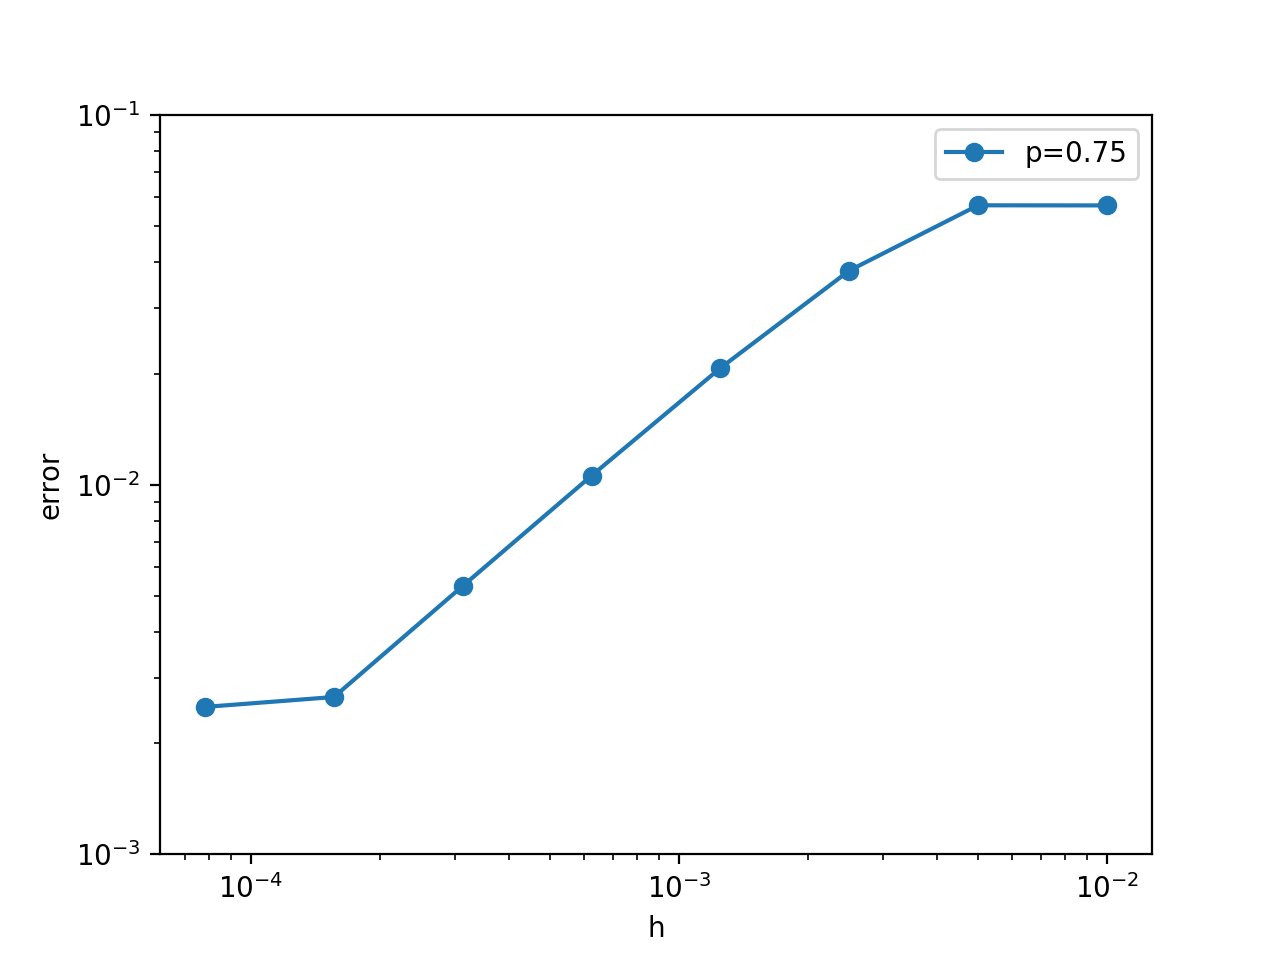

In [51]:

%matplotlib notebook

#convergence plot for h

H, E, p = convergence_h(6,m,n,mu,a)

plt.figure()
plt.loglog(H,E,'o-', label='p={:.2f}'.format(p))
#plt.grid('on')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.ylim(10**(-3), 10**(-1))
plt.show()


#convergence plot for k

K, E, p = convergence_h(6,m,n,mu,a)

plt.figure()
plt.loglog(K,E,'o-', label='p={:.2f}'.format(p))
#plt.grid('on')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
plt.ylim(10**(-3), 10**(-1))
plt.show()


#plt.savefig('convergenceplot.pdf')


### Plot Solutions

<IPython.core.display.Javascript object>


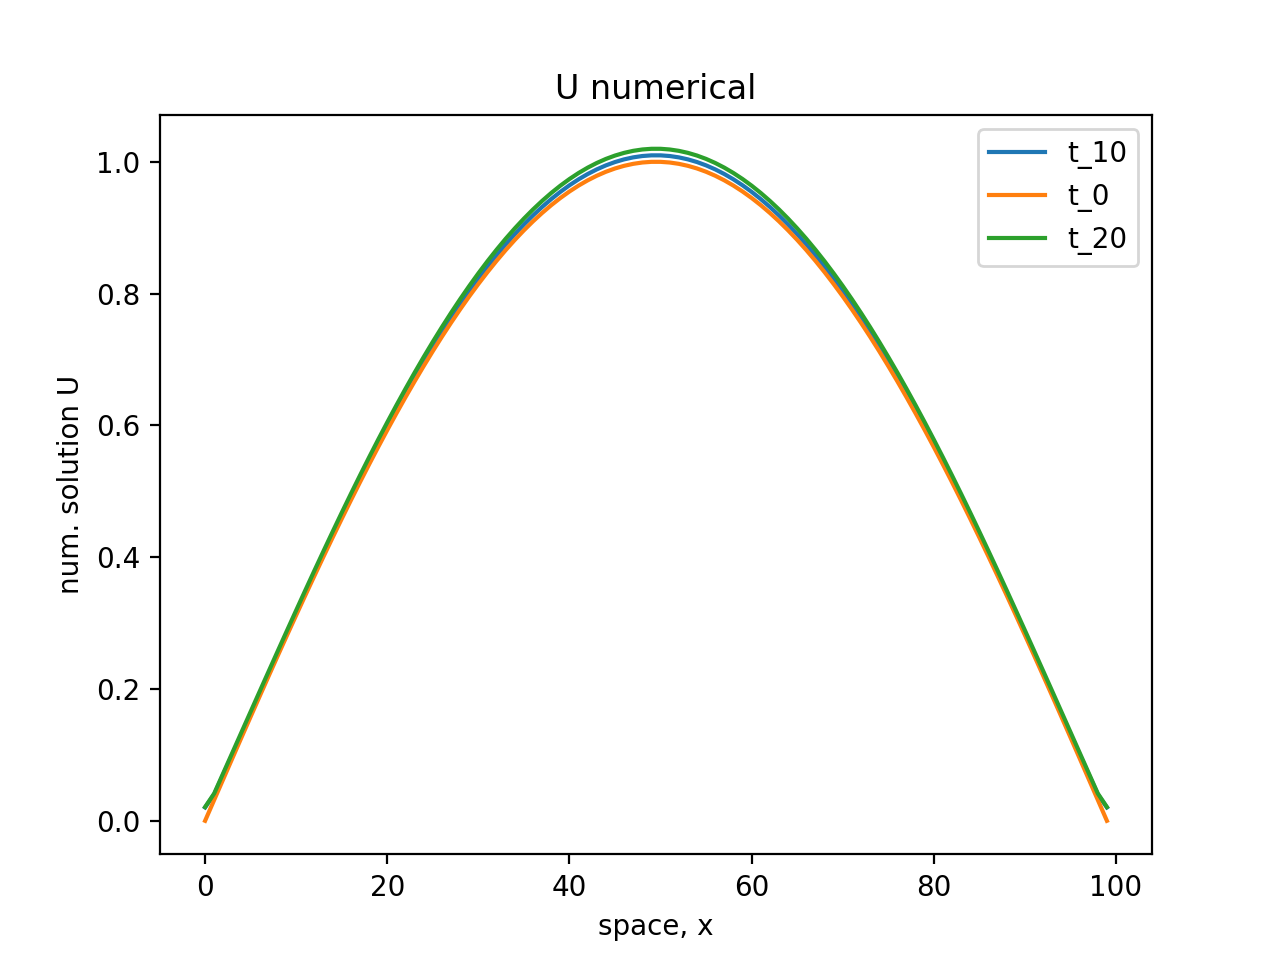

<IPython.core.display.Javascript object>


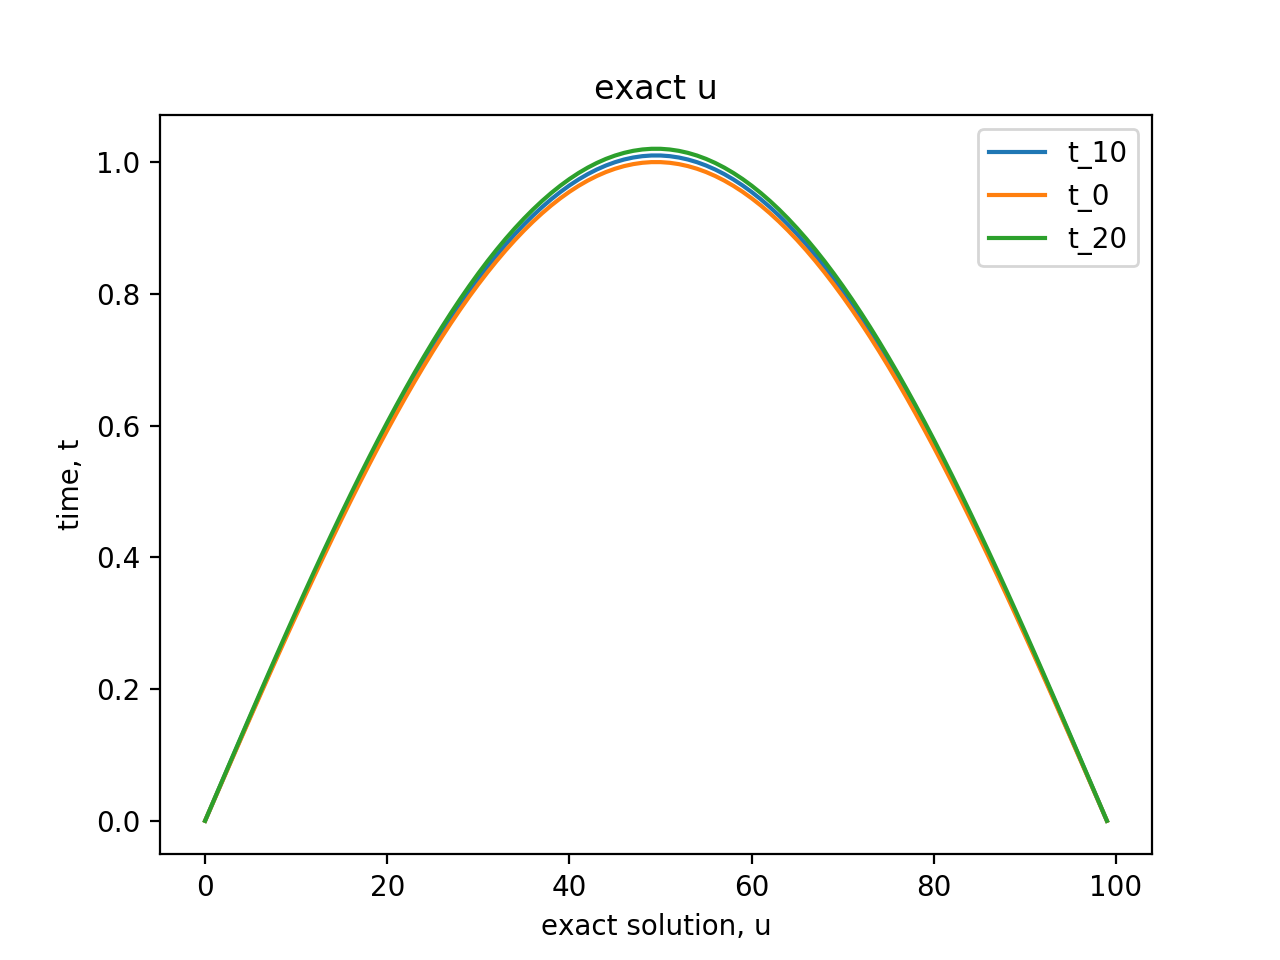

In [48]:
plt.figure()
plt.plot(U[10], label="t_10")
plt.plot(U[0], label = "t_0")
plt.plot(U[20], label="t_20")
plt.title("U numerical")
plt.xlabel("space, x")
plt.ylabel("num. solution U")
plt.legend()
plt.show()


plt.figure()
plt.plot(u_exact[10], label="t_10")
plt.plot(u_exact[0], label = "t_0")
plt.plot(u_exact[20], label = "t_20")
plt.title("exact u")
plt.xlabel("exact solution, u")
plt.ylabel("time, t")

plt.legend()

plt.show()